# 1. Problem definition

**Airbnb rental company** 
### problem:
As a host, if we try to charge above market price for a living space we'd like to rent, then renters will select more affordable alternatives which are similar to ours. If we set our nightly rent price too low, we'll miss out on potential revenue.

**One strategy we could use is to:**

* find a few listings that are similar to ours,
* average the listed price for the ones most similar to ours,
* set our listing price to this calculated average price.

**The process of discovering patterns in existing data to make a prediction is called `machine learning`**.
* In our case, we want to use data on local listings to predict the optimal price for us to set. 
* In this mission, we'll explore a specific machine learning technique called **`k-nearest neighbors`**, which mirrors the strategy we just described

# 2. Introduction to the data

* While AirBnB doesn't release any data on the listings in their marketplace, a separate group named Inside AirBnB has extracted data on a sample of the listings for many of the major cities on the website. 
* In this post, we'll be working with their dataset from October 3, 2015 on the listings from Washington, D.C., the capital of the United States. 
* [Here's a direct link to that dataset]().
* Each row in the dataset is a specific listing that's available for renting on AirBnB in the Washington, D.C. area.

In [1]:
import pandas as pd 
dc_listings=pd.read_csv('dc_airbnb.csv')

print(dc_listings.iloc[0])
dc_listings.head()

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


# 3. K-nearest neighbors

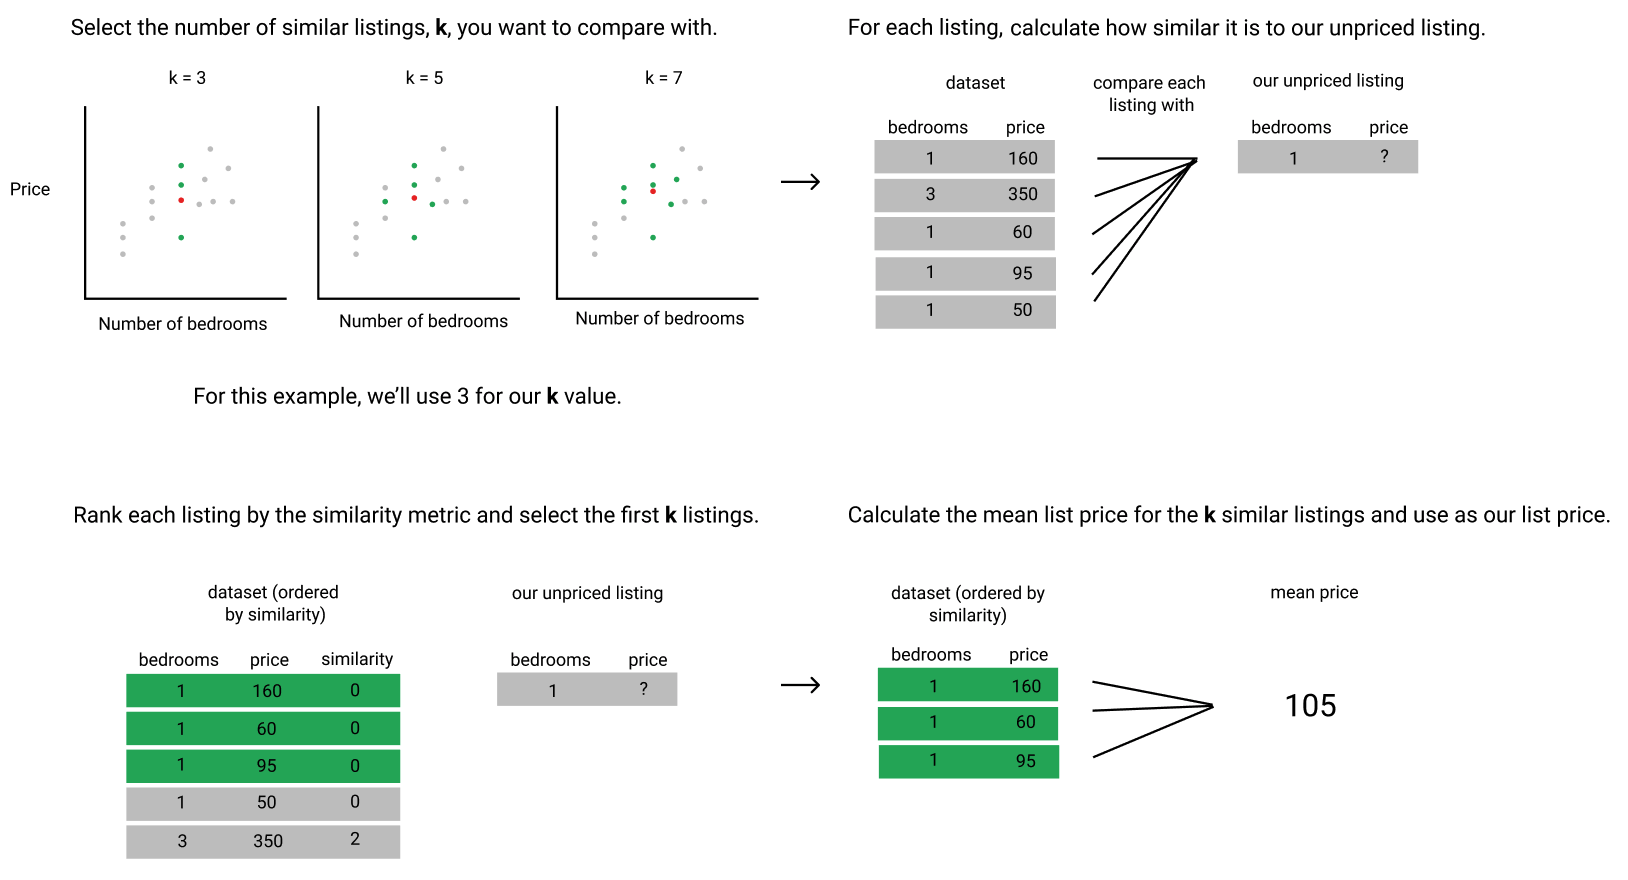

#### There are 2 things we need to unpack in more detail:

* **the similarity metric**
* **how to choose the k value**

# 4. Euclidean distance

**The similarity metric works by comparing a fixed set of numerical features,** another word for attributes, between 2 observations, or living spaces in our case. 
* When trying to predict a **continuous value**, like price, the main similarity metric that's used is **Euclidean distance.**

`d=sqrt((q1-p1)^2 + (q2-p2)^2 + ...(qn-pn)^2)`

* where q1 to qn represent the **feature values for one observation** and p1 to pn represent the **feature values for the other observation.** 

In this mission, we'll use just **one feature to keep things simple** as you become familiar with the machine learning workflow. Since we're only using one feature, this is known as the **univariate case**.

## TODO:
* calculate the Euclidean distance between our living space, which can accommodate 3 people, and the first living space in the dc_listings Dataframe.
* Assign the result to first_distance and display the value using the print function.

In [2]:
import numpy as np
our_acc_value = 3
first_living_space_value = dc_listings.iloc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


# 5. Calculate distance for all observations

* The Euclidean distance between the first row in the dc_listings Dataframe and our own living space is 1. How do we know if this is high or low? 
* If you look at the Euclidean distance equation itself, the lowest value you can achieve is 0. This happens when the value for the feature is exactly the same for both observations you're comparing. If p1=q1, then  |q1-p1|=0  which results in 0.
* The closer to 0 the distance the more similar the living spaces are.

## TODO:
* Calculate the distance between each value in the accommodates column from dc_listings and the value 3, which is the number of people our listing accommodates:
* Use the apply method to calculate the absolute value between each value in accommodates and 3 and return a new Series containing the distance values.
* Assign the distance values to the distance column.
* Use the Series method value_counts and the print function to display the unique value counts for the distance column.

In [3]:
our_accomodation=3
dc_listings['distance']=dc_listings['accommodates'].apply(lambda x:np.abs(x-our_accomodation))
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


# 6. Randomizing, and sorting

`It looks like there are quite a few, 461 to be precise, `living spaces that can accommodate 3 people just like ours. This means the 5 "nearest neighbors" we select after sorting all will have a distance value of 0.
* If we sort by the distance column and then just select the first 5 living spaces, we would be biasing the result to the ordering of the dataset.


In [4]:
print(dc_listings[dc_listings["distance"] == 0]["accommodates"])

26      3
34      3
36      3
40      3
44      3
45      3
48      3
65      3
66      3
71      3
75      3
86      3
103     3
104     3
108     3
115     3
124     3
125     3
129     3
130     3
131     3
133     3
136     3
140     3
146     3
147     3
150     3
151     3
162     3
164     3
       ..
3437    3
3451    3
3478    3
3488    3
3506    3
3510    3
3514    3
3515    3
3546    3
3555    3
3560    3
3568    3
3572    3
3578    3
3582    3
3593    3
3603    3
3612    3
3619    3
3625    3
3626    3
3631    3
3640    3
3651    3
3667    3
3675    3
3697    3
3707    3
3714    3
3722    3
Name: accommodates, Length: 461, dtype: int64


Let's instead randomize the ordering of the dataset and then sort the Dataframe by the distance column. **This way, all of the living spaces with the same number of bedrooms will still be at the top of the Dataframe but will be in random order across the first 461 rows.** 

## TODO:
* Randomize the order of the rows in dc_listings: 
  * Use the np.random.permutation() function to return a NumPy array of shuffled index values.
  * Use the Dataframe method loc[] to return a new Dataframe containing the shuffled order.
* Assign the new Dataframe back to dc_listings.
* After randomization, sort dc_listings by the distance column and assign back to dc_listings.
* Display the first 10 values in the price column using the print function.

In [5]:
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])
dc_listings

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,$185.00,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,$180.00,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,$175.00,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,$128.00,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,$115.00,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0
380,58%,51%,480,3,Entire home/apt,NaN,1.0,1.0,$219.00,NaN,NaN,4,1125,0,38.900820,-77.052956,Washington,20037,DC,0
943,NaN,NaN,1,3,Private room,1.0,1.0,1.0,$125.00,$25.00,NaN,1,1125,3,38.913882,-77.038468,Washington,20009,DC,0
3107,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$250.00,NaN,NaN,1,1125,0,38.934027,-77.035193,Washington,20010,DC,0
1499,62%,77%,1,3,Entire home/apt,0.0,1.0,2.0,$94.00,NaN,NaN,1,1125,2,38.878030,-77.019914,Washington,20024,DC,0
625,100%,0%,1,3,Entire home/apt,1.0,1.0,1.0,$150.00,NaN,NaN,1,1125,5,38.907031,-77.029510,Washington,20005,DC,0


# 7. Average price

Before we can select the 5 most similar living spaces and compute the average price, we need to clean the price column. Right now, the price column contains comma characters (,) and dollar sign characters and is formatted as a text column instead of a numeric one. We need to remove these values and convert the entire column to the float datatype. 

## TODO:
* Remove the commas (,) and dollar sign characters ($) from the price column:
Use the str accessor so we can apply string methods to each value in the column followed by the string method replace to replace all comma characters with the empty character: stripped_commas = dc_listings['price'].str.replace(',', '')
Repeat to remove the dollar sign characters as well.
* Convert the new Series object containing the cleaned values to the float datatype and assign back to the price column in        dc_listings.
* Calculate the mean of the first 5 values in the price column and assign to mean_price.
Use the print function or the variable inspector below to display mean_price.

In [6]:
dc_listings['price']=dc_listings['price'].str.replace(',','').str.replace('$','').astype(float)

In [7]:
mean_price=dc_listings.iloc[:5]['price'].mean()

In [8]:
print(mean_price)

156.6


# 8. Function to make predictions

## TODO:
* Write a function named predict_price that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates. This function should:
  * Take in a single parameter, new_listing, that describes the number of bedrooms.
  * We've added code that assigns dc_listings to a new Dataframe named temp_df. We used the pandas.DataFrame.copy() method so the underlying dataframe is assigned to temp_df, instead of just a reference to dc_listings.
  * Calculate the distance between each value in the accommodates column and the new_listing value that was passed in. Assign the resulting Series object to the distance column in temp_df.
  * Sort temp_df by the distance column and select the first 5 values in the price column. Don't randomize the ordering of temp_df.
  * Calculate the mean of these 5 values and use that as the return value for the entire predict_price function.
* Use the predict_price function to suggest a price for a living space that:

  * accommodates 1 person, assign the suggested price to acc_one.
  * accommodates 2 people, assign the suggested price to acc_two.
  * accommodates 4 people, assign the suggested price to acc_four.

In [9]:
dc_listings=pd.read_csv('dc_airbnb.csv')
def predict_price(new_listing):
    np.random.seed(1)
    temp_df=dc_listings.copy()
    temp_df['distance']=temp_df['accommodates'].apply(lambda x:np.abs(x-new_listing))
    temp_df['price']=temp_df['price'].str.replace(',','').str.replace('$','').astype(float)
    temp_df=temp_df.loc[np.random.permutation(len(dc_listings))]
    temp_df=temp_df.sort_values('distance')
    nearest_neighbors=temp_df.iloc[:5]['price']
    predicted_value=nearest_neighbors.mean()
    return predicted_value
    

In [10]:
acc_one=predict_price(1)
acc_one

68.0

In [11]:
acc_two=predict_price(2)
acc_two

112.8

In [12]:
acc_four=predict_price(4)
acc_four

124.8